In [2]:
from tweepy import OAuthHandler
from tweepy import API
from tweepy import Cursor
from datetime import datetime, date, time, timedelta
from collections import Counter
import sys

In [3]:
#GET ACCESS TO THE TWITTER API

if __name__ == '__main__':
    consumer_key = "uZYjns4cjY2TuPK21keO4bK0G"
    consumer_secret = "epLgZk4cQHM8qwyH3yPbuGD5omPWk90Z1vcj1qpQpg35Q02NhZ"
    access_token = "1244994048-OgBzJftUysSinA0geqYnHPeBaLRVgACvZdCoofX"
    access_token_secret = "TXI3OoX0dwvNNnTl0vTUt5PeDjc9KSzk50gxnyJnLTxzw"
 
    auth = OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    auth_api = API(auth)

In [4]:
#PUT THE TWITTER HANDLES IN A LIST

#Lebron James -- KingJames
#Kevin Durant -- KDTrey5
#Stephen Curry -- StephenCurry30
#Carmelo Anthony -- carmeloanthony
#Pau Gasol -- paugasol
#Chris Paul -- CP3
#Dwight Howard -- DwightHoward
#James Harden -- JHarden13
#Russell Westbrook -- russwest44
#Blake Griffin -- blakegriffin23
account_list = ["KingJames", "KDTrey5", "StephenCurry30", "carmeloanthony", "paugasol", "CP3", "DwightHoward", "JHarden13", "russwest44", "blakegriffin23"]

In [5]:
import re
import unicodedata

In [6]:
#THIS BOX GETS ALL THE TWEETS AND WRITES THEM TO RESPECTIVE TEXT FILES

filenames = []
totalTweets = []
friends = []
followers = []
accountAge = []
recentTweetCount = []

if len(account_list) > 0:
    for target in account_list:
        #create the file to store the tweets
        filename = target + ".txt"
        filenames.append(filename)
        currentPlayerFile = open(filename, 'w')
        
        print("Getting data for " + target)
        item = auth_api.get_user(target)
        print("name: " + item.name)
        
        #Append the amount of tweets the user has ever made
        totalTweets.append(item.statuses_count)
        
        #Append the amount of friends the user has
        friends.append(item.friends_count)
        
        #Append the amount of friends the user has
        followers.append(item.followers_count)
        
        #Find how long the account has been active
        tweets = item.statuses_count
        account_created_date = item.created_at
        delta = datetime.utcnow() - account_created_date
        account_age_days = delta.days
        
        #Record how old the account is
        print("Account age (in days): " + str(account_age_days))
        accountAge.append(account_age_days)
        
        #Iterate through each tweet from the last 1000 Days
        tweet_count = 0
        end_date = datetime.utcnow() - timedelta(days=1000)
        for status in Cursor(auth_api.user_timeline, screen_name=target).items():
            
#################### CLEANING TWEETS HERE #########################
            #Convert to a string without emojis
            currentTweet = status.text
            convertTweet = unicodedata.normalize('NFKD', currentTweet).encode('ascii','ignore')
            currentPlayerFile.write(convertTweet + "\n")
            
###################################################################

            #THIS IS WHERE WE FIND THE MOST USED MENTIONS AND HASHTAGS
            tweet_count += 1
            if status.created_at < end_date:
                break

        print "All done. Processed " + str(tweet_count) + " tweets."
        recentTweetCount.append(tweet_count)
        #print
        currentPlayerFile.close()

Getting data for KingJames
name: LeBron James
Account age (in days): 3561
All done. Processed 1184 tweets.
Getting data for KDTrey5
name: Kevin Durant
Account age (in days): 3508
All done. Processed 719 tweets.
Getting data for StephenCurry30
name: Stephen Curry
Account age (in days): 3480
All done. Processed 614 tweets.
Getting data for carmeloanthony
name: Carmelo Anthony
Account age (in days): 3481
All done. Processed 413 tweets.
Getting data for paugasol
name: Pau Gasol
Account age (in days): 3074
All done. Processed 1825 tweets.
Getting data for CP3
name: Chris Paul
Account age (in days): 3440
All done. Processed 672 tweets.
Getting data for DwightHoward
name: Dwight Howard
Account age (in days): 3701
All done. Processed 1490 tweets.
Getting data for JHarden13
name: James Harden
Account age (in days): 3449
All done. Processed 332 tweets.
Getting data for russwest44
name: Russell Westbrook
Account age (in days): 3508
All done. Processed 304 tweets.
Getting data for blakegriffin23
n

In [7]:
#Record Account Ages Here
accountAges = [3560,3507,3479,3480,3073,3439,3701,3448,3507,3512]

In [8]:
#HERE I AM STARTING THE SENTIMENT ANALYSIS PART OF THE CODE
import enchant
import string 
import nltk
nltk.download('stopwords')
from afinn import Afinn
afinn = Afinn()
import numpy as np
import matplotlib.pyplot as plt

# Get a list of stopwords from nltk
stopwords = nltk.corpus.stopwords.words("english")
d = enchant.Dict("en_US")

#Keep a place for the average sentiments
AVG_SENTIMENTS = []

#Go through each player's file of tweeets
for file in filenames:
    lines = [line.rstrip('\n') for line in open(file)]
    cleanTweets = []

    for line in lines:
        #take off the '\n'
        cleanLine = line.translate(None, string.punctuation)
        
        #this gets rid of urls, and non common english words
        english_words = []
        for word in cleanLine.split():
            if d.check(word):
                english_words.append(word)
    
        english_phrase = " ".join(english_words)
        
        #get rid of stopwords and make all lower case
        final_phrase = [w.lower() for w in re.findall('\w+', english_phrase) if w.lower() not in stopwords]
        final_phrase = " ".join(final_phrase)
        
        #rejoin the characters
        cleanTweets.append("".join(final_phrase))
    
    #determine the sentiment score for each tweet
    tweetScores = [afinn.score(s)/len(s.split(" ")) for s in cleanTweets]
    
    #find the mean of the tweet sentiments for all of the player's tweets
    avg_sentiment = np.mean(tweetScores)
        
    AVG_SENTIMENTS.append(avg_sentiment)
    
    print "Done with" + file

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/holdenbridge/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Done withKingJames.txt
Done withKDTrey5.txt
Done withStephenCurry30.txt
Done withcarmeloanthony.txt
Done withpaugasol.txt
Done withCP3.txt
Done withDwightHoward.txt
Done withJHarden13.txt
Done withrusswest44.txt
Done withblakegriffin23.txt


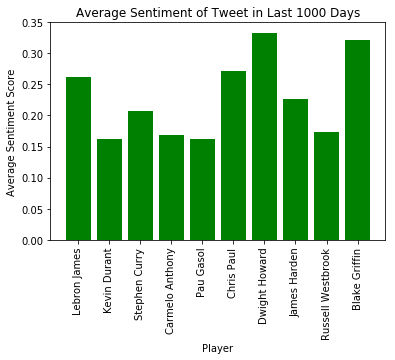

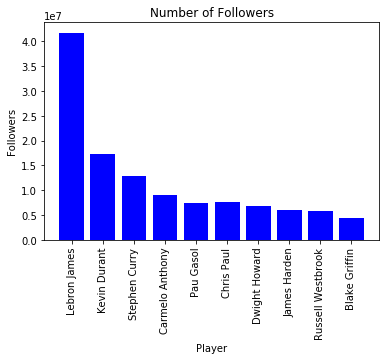

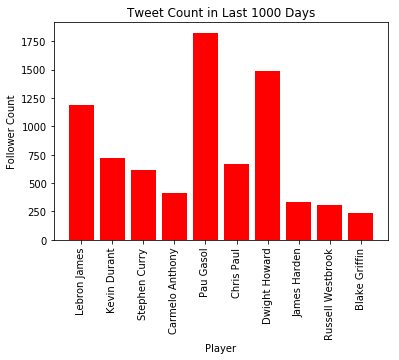

In [9]:
#HERE WE PLOT THE DATA

names = ["Lebron James", "Kevin Durant", "Stephen Curry", "Carmelo Anthony", "Pau Gasol", "Chris Paul", "Dwight Howard", "James Harden", "Russell Westbrook", "Blake Griffin"]

plt.bar(names, AVG_SENTIMENTS, color = 'g')
plt.title("Average Sentiment of Tweet in Last 1000 Days")
plt.xlabel("Player")
plt.ylabel("Average Sentiment Score")
plt.xticks(rotation='vertical')
plt.show()

plt.bar(names, followers, color = 'b')
plt.title("Number of Followers")
plt.xlabel("Player")
plt.ylabel("Followers")
plt.xticks(rotation='vertical')
plt.show()

plt.bar(names, recentTweetCount, color = 'r')
plt.title("Tweet Count in Last 1000 Days")
plt.xlabel("Player")
plt.ylabel("Follower Count")
plt.xticks(rotation='vertical')
plt.show()


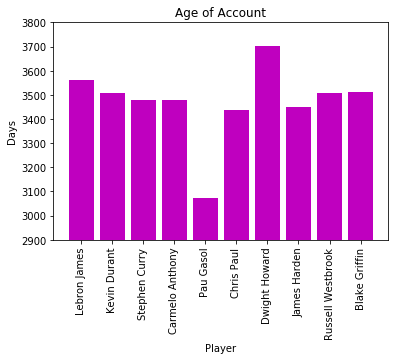

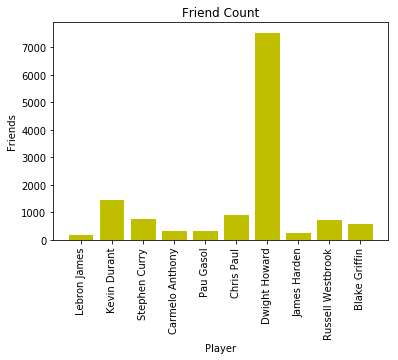

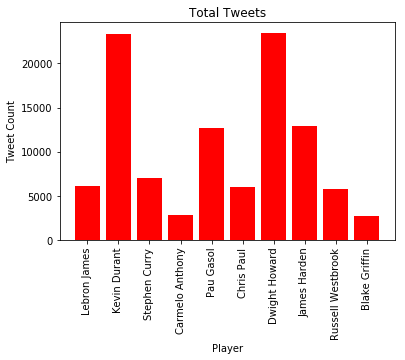

In [10]:
#PLOT THE DATA CONTINUED

plt.bar(names, accountAges, color = 'm')
plt.title("Age of Account")
plt.xlabel("Player")
plt.ylabel("Days")
plt.ylim(2900,3800)
plt.xticks(rotation='vertical')
plt.show()

plt.bar(names, friends, color = 'y')
plt.title("Friend Count")
plt.xlabel("Player")
plt.ylabel("Friends")
plt.xticks(rotation='vertical')
plt.show()

plt.bar(names, totalTweets, color = 'r')
plt.title("Total Tweets")
plt.xlabel("Player")
plt.ylabel("Tweet Count")
plt.xticks(rotation='vertical')
plt.show()